# PART 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist

from sklearn.linear_model import LinearRegression


# 1. Import and Warehouse Data

In [2]:
data = pd.read_json('Part1 - Car-Attributes.json')
data.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


In [3]:
data2 = pd.read_csv('Part1 - Car name.csv')
data2.head(10)



,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
5,ford galaxie 500
6,chevrolet impala
7,plymouth fury iii
8,pontiac catalina
9,amc ambassador dpl


In [4]:
data.shape

(398, 8)

In [5]:
data2.shape

(398, 1)

In [6]:
df = data2.join(data,how='outer')

In [7]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
df.shape

(398, 9)

In [9]:
df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [11]:
df.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 51.1+ KB


#### We can see that hp is 'object' data type, there might be some special characters or spaces in it. 

In [13]:
df = df.replace('?', np.nan)
df = df.replace(np.nan, df.hp.median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 51.1+ KB


#### Now we have the variables in the desired data types. Now lets convert categorical into continuous using label encoding. 

In [14]:
df.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [15]:
df.cyl.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

#### There are no variable which require label encoding in this data. So we can move ahead to 

## Data analysis and Visualisation

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


#### Count of all the variables is same.

#### MPG: Mean and Median are almost same, we can expect am evenly spread data following normal distribution. 

#### CYL: It is a descrete variable. We can check value counts or draw Pie chart to check the distribution. 

#### Disp: Mean is greater than Median, We shall see a right skewed distribuion. 

#### hp: Mean is greater than Median, We shall see a right skewed distribution. 

#### wt: Mean and Median are close, We shall see a slightly right skewed distribution. Distribution seems to be even. 

#### acc: Mean and Median are same. we can expect am evenly spread data following normal distribution. 

#### Year & Origin: It is a multi valued discrete variable. We shall build another graphs for this. 


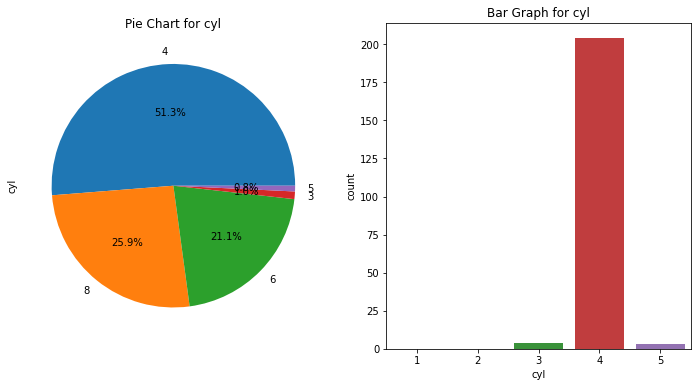

In [17]:
f,axes=plt.subplots(1,2,figsize=(12,6))
df['cyl'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('cyl',data=df,ax=axes[1],order=[1,2,3,4,5])
axes[0].set_title('Pie Chart for cyl')
axes[1].set_title('Bar Graph for cyl')
plt.show()

#### We can see that most of the features are of 4 cylinders. 

In [18]:
def histogram_boxplot(feature, figsize=(12,8), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           )
    sns.boxplot(feature, ax=ax_box2, color='violet') 
    sns.displot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=True, ax=ax_hist2) 


None
None
None
None


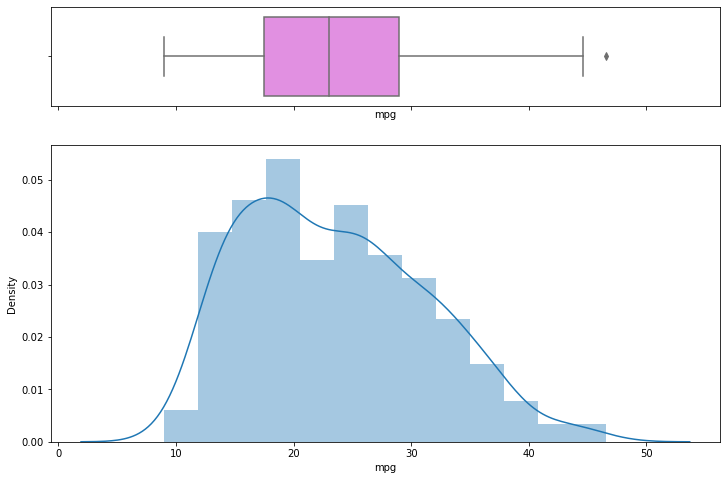

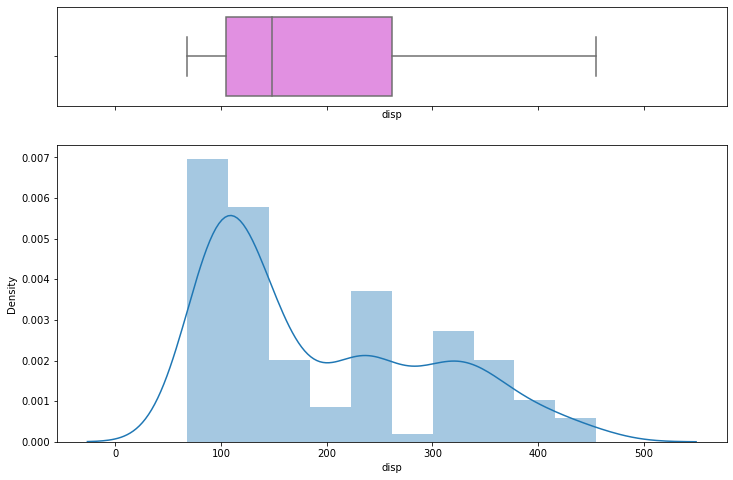

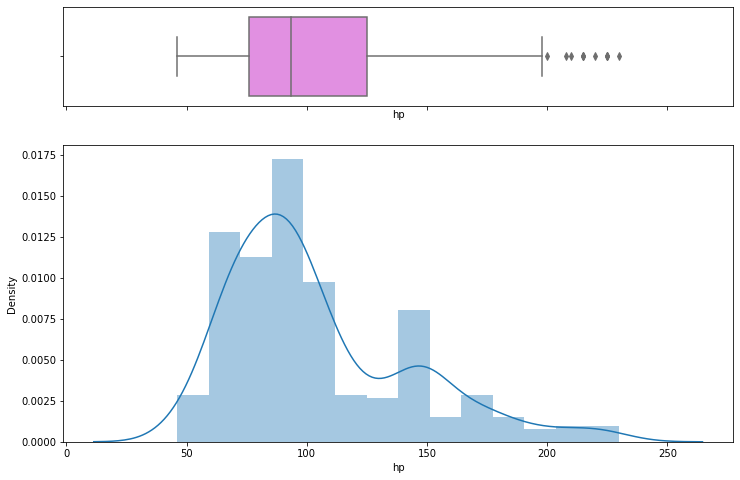

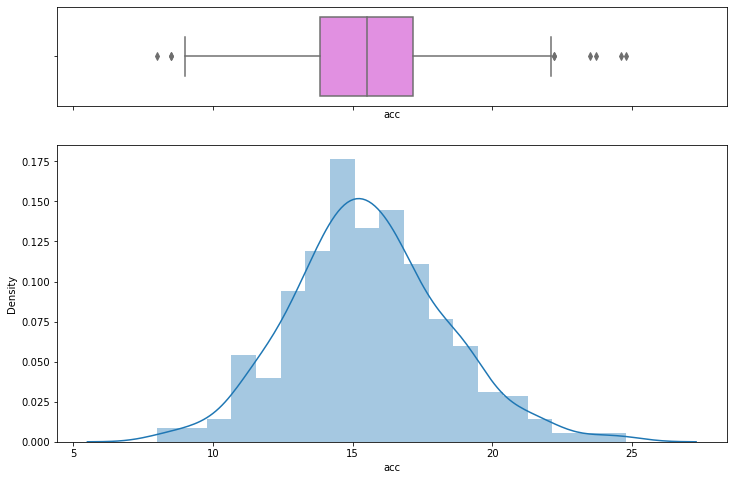

In [19]:
col = list (df.columns)
for column in col:
    if df[column].dtypes == 'float64':
        print (histogram_boxplot(df[column]))

### Continous features MPG, Disp, Hp, and ACC

#### MPG follows a normal distribution, with even spread.
#### Disp and HP follows a right skewed distribution. 
#### Acc also follows a normal distrbution. 

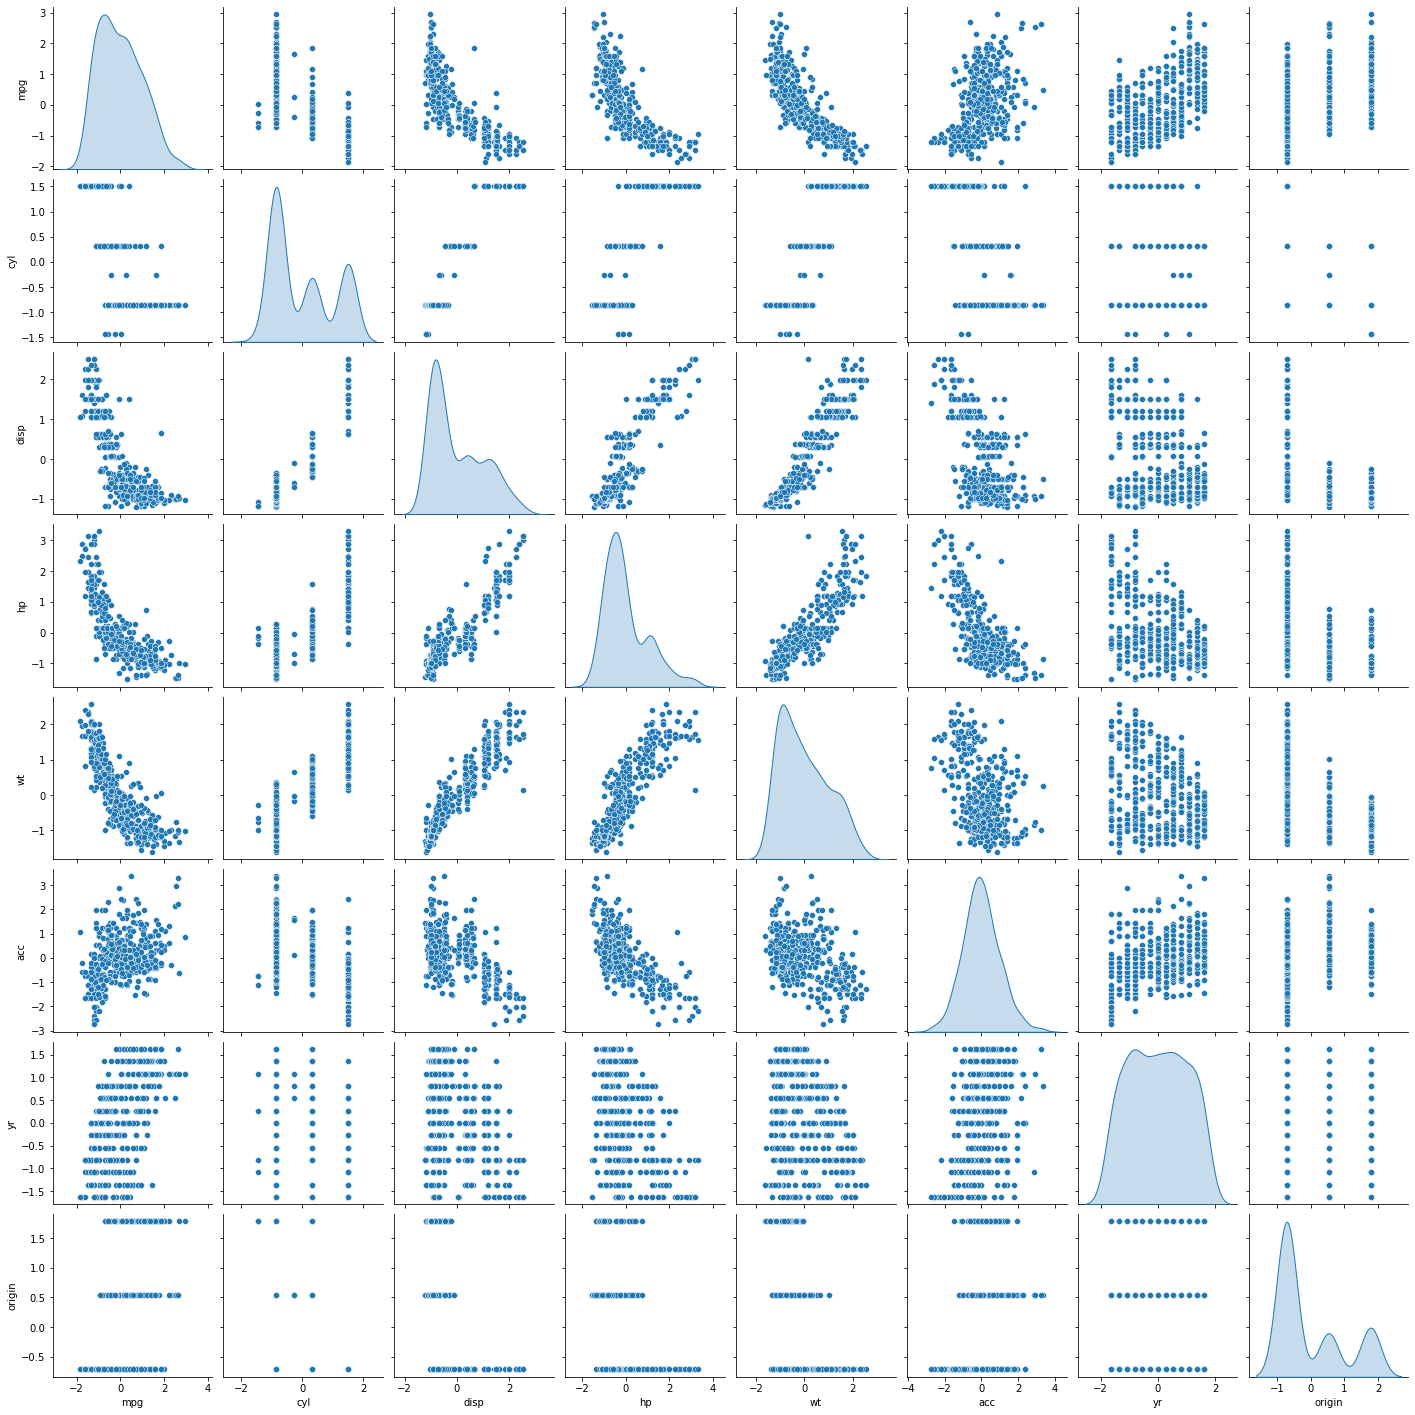

In [20]:
mpg_attr = df.iloc[:,1:]
mpg_sc = mpg_attr.apply(zscore)
sns.pairplot(mpg_sc, diag_kind='kde')

#### By pairplot, we can assume that we need around 3 or 4 clusters. 

Text(0.5, 1.0, 'Selecting K model with Elbow Method')

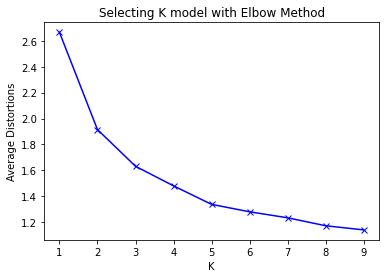

In [21]:
clusters = range(1,10)
meanDist = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit (mpg_sc)
    prediction = model.predict(mpg_sc)
    meanDist.append(sum(np.min(cdist(mpg_sc, model.cluster_centers_, 'euclidean'),axis=1))/mpg_sc.shape[0])

plt.plot(clusters, meanDist, 'bx-')
plt.xlabel('K')
plt.ylabel('Average Distortions')
plt.title('Selecting K model with Elbow Method')

#### We can see the curve is flattening after 5, So we shall choose 3, or 4 clusters here.

In [22]:
final_model = KMeans(3, random_state=2)
final_model.fit(mpg_sc)
prediction = final_model.predict(mpg_sc)

df['Group_3'] = prediction
mpg_sc ['Group_3'] = prediction
print ('Groups assigned : \n')

df.head(10)

Groups assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Group_3
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,1
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,1
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,1
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,1
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,1,1


In [23]:
mpg_clust = df.groupby(['Group_3'])
mpg_clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
Group_3,,,,,,,,
0,21.69562,5.240876,187.558394,94.897810,2990.861314,16.772263,76.313869,1.087591
1,14.71500,7.980000,346.370000,160.550000,4126.910000,12.721000,73.750000,1.000000
2,30.52795,4.068323,103.422360,77.372671,2234.720497,16.311801,77.155280,2.341615


In [24]:
df.Group_3.value_counts()

2    161
0    137
1    100
Name: Group_3, dtype: int64

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[Group_3]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[Group_3]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[Group_3]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[Group_3]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[Group_3]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[Group_3]'>],
       [<AxesSubplot:title={'center':'wt'}, xlabel='[Group_3]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[Group_3]'>,
        <AxesSubplot:>]], dtype=object)

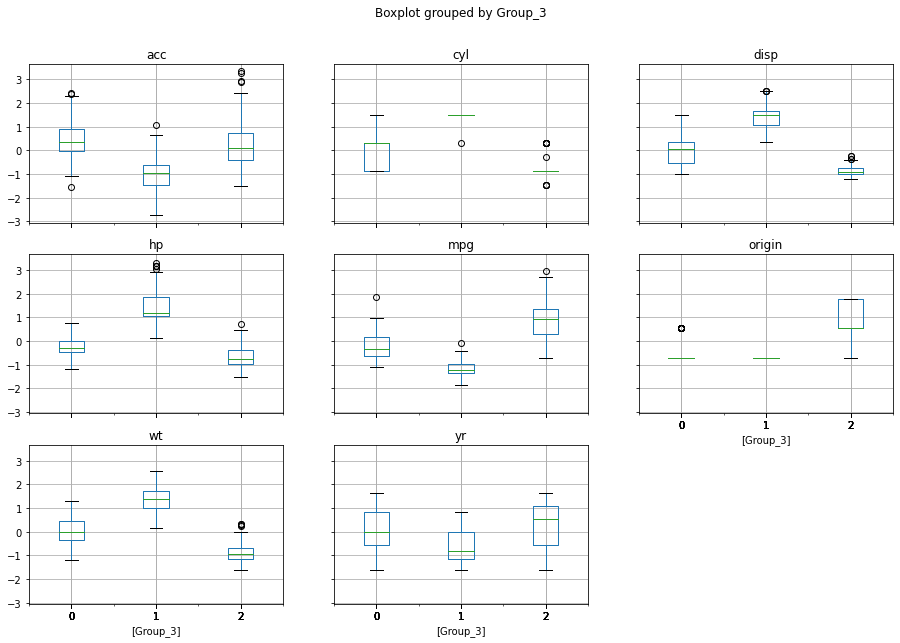

In [25]:
mpg_sc.boxplot(by= 'Group_3',layout = (3,3), figsize=(15,10))

#### We can see that the 3 groups created have 161, 137, and 100 features respecively. The distribution seems to be fair, but lets see how it performs with 4 Clusters

#### We can also see that in most of the features we have very distinct groups, with some overlapping in just Year column

#### Let's build the model with 4 clusters now

In [26]:
final_model = KMeans(4, random_state=2)
final_model.fit(mpg_sc)
prediction = final_model.predict(mpg_sc)

df['Group_4'] = prediction
mpg_sc ['Group_4'] = prediction
print ('Groups assigned : \n')

df.head(10)

Groups assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Group_3,Group_4
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1,0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1,0
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,1,0
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,1,0
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,1,0
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,1,0
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,1,1,0


In [27]:
mpg_clust = df.groupby(['Group_4'])
mpg_clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin,Group_3
Group_4,,,,,,,,,
0,14.715000,7.980000,346.370000,160.550000,4126.910000,12.721000,73.750000,1.000000,1
1,34.408140,4.104651,104.604651,72.953488,2225.093023,16.619767,80.034884,2.209302,2
2,21.695620,5.240876,187.558394,94.897810,2990.861314,16.772263,76.313869,1.087591,0
3,26.078667,4.026667,102.066667,82.440000,2245.760000,15.958667,73.853333,2.493333,2


In [28]:
df.Group_4.value_counts()

2    137
0    100
1     86
3     75
Name: Group_4, dtype: int64

array([[<AxesSubplot:title={'center':'Group_3'}, xlabel='[Group_4]'>,
        <AxesSubplot:title={'center':'acc'}, xlabel='[Group_4]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[Group_4]'>],
       [<AxesSubplot:title={'center':'disp'}, xlabel='[Group_4]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[Group_4]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[Group_4]'>],
       [<AxesSubplot:title={'center':'origin'}, xlabel='[Group_4]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[Group_4]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[Group_4]'>]],
      dtype=object)

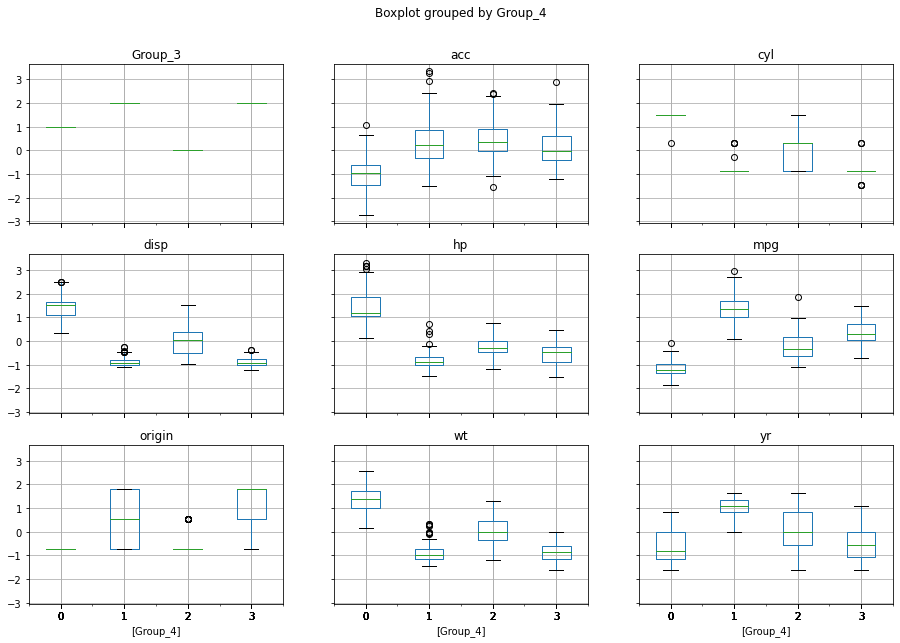

In [29]:
mpg_sc.boxplot(by= 'Group_4',layout = (3,3), figsize=(15,10))

#### Boxplot with 4 clusters shows more overlapping than 3. We should go with 3 distinct clusters.

#### The data captured was adequately filtered with a few missing values which were a bit tricky to find,
#### Distribution of most of the data was nice, with some disparities.
#### The data was large in size, which helped building more models. 



### Things to be improved: 
#### We can try to avoid disparities.
#### Filter null values, hidden as spaces or special characters. 
#### Quantity was good, but can be improved. 




# PART 2

In [30]:
data = pd.read_excel('Part2 - Company.xlsx')
data.head(10)

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
5,153,140,154,199,NaN
6,34,28,78,22,Quality A
7,191,144,143,154,NaN
8,160,181,194,178,Quality B
9,145,178,158,141,NaN


In [31]:
data.Quality.isna()

0     False
1     False
2      True
3     False
4     False
      ...  
56    False
57     True
58     True
59     True
60     True
Name: Quality, Length: 61, dtype: bool

In [32]:
data.Quality[58]

nan

In [33]:
data.dtypes

A           int64
B           int64
C           int64
D           int64
Quality    object
dtype: object

In [34]:
hpIsDigit = pd.DataFrame(data.Quality.str.isdigit()) 

data[hpIsDigit['Quality'] == False] 

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
6,34,28,78,22,Quality A
8,160,181,194,178,Quality B
10,76,94,107,37,Quality A
11,138,200,153,192,Quality B
12,27,106,57,37,Quality A
13,45,76,56,57,Quality A


In [35]:
data.Quality.value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

#### Let's use label encoder and change Quality A = 0, Quality B = 1

In [36]:
data['Quality'].replace(['Quality A','Quality B'],[0,1],inplace=True)

In [37]:
data.head()

,A,B,C,D,Quality
0,47,27,45,108,0.0
1,174,133,134,166,1.0
2,159,163,135,131,NaN
3,61,23,3,44,0.0
4,59,60,9,68,0.0


#### We have successfully given labels to the Quality variable. Now lets impute the missing values with data. 

#### To impute the values, we shall divide the data into two clusters.

In [38]:
data_attr = data.drop(columns='Quality')
data_attr.head()

,A,B,C,D
0,47,27,45,108
1,174,133,134,166
2,159,163,135,131
3,61,23,3,44
4,59,60,9,68


In [39]:
data_attr.apply(zscore)

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864
...,...,...,...,...
56,1.329392,1.207924,1.089784,1.030599
57,0.301040,1.138264,0.782448,1.349962
58,-0.498789,-1.352098,-1.614775,-0.198947
59,1.002931,0.702886,1.197352,1.333994


In [40]:
final_model = KMeans(2, random_state=3)
final_model.fit(data_attr)
prediction = final_model.predict(data_attr)

data['Quality Cluster'] = prediction
data_attr ['Quality Cluster'] = prediction
print ('Groups assigned : \n')

data.head(20)

Groups assigned : 



,A,B,C,D,Quality,Quality Cluster
0,47,27,45,108,0.0,0
1,174,133,134,166,1.0,1
2,159,163,135,131,NaN,1
3,61,23,3,44,0.0,0
4,59,60,9,68,0.0,0
5,153,140,154,199,NaN,1
6,34,28,78,22,0.0,0
7,191,144,143,154,NaN,1
8,160,181,194,178,1.0,1
9,145,178,158,141,NaN,1


#### We can see the the newly created column 'Quality Clusters' is same as the Quality column in the data. But without any missing values. We can use this new column or we can also copy the newly created data to old 'Quality' column. 


In [41]:
data = data.drop(columns='Quality')

#### We can reverse the label encoded to keep the data in its original form 


In [42]:
data['Quality Cluster'].replace([0,1],['Quality A','Quality B'],inplace=True)
data.head(10)

,A,B,C,D,Quality Cluster
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,Quality B
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
5,153,140,154,199,Quality B
6,34,28,78,22,Quality A
7,191,144,143,154,Quality B
8,160,181,194,178,Quality B
9,145,178,158,141,Quality B


In [43]:
data.isna().sum()

A                  0
B                  0
C                  0
D                  0
Quality Cluster    0
dtype: int64

# PART 3

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

In [45]:
df = pd.read_csv('Part3 - vehicle.csv')
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [46]:
df.shape

(846, 19)

In [47]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#### We can see the na values are very few compared to the dataset, We can drop the na values.

In [48]:
df = df.dropna()

In [49]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

#### All fields are of the desired data types. 

In [51]:
df['class'].value_counts()


car    413
bus    205
van    195
Name: class, dtype: int64

In [52]:
labelencoder = LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])
df['class'].value_counts()

1    413
0    205
2    195
Name: class, dtype: int64

#### 1-car
#### 0-bus
#### 2-van

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


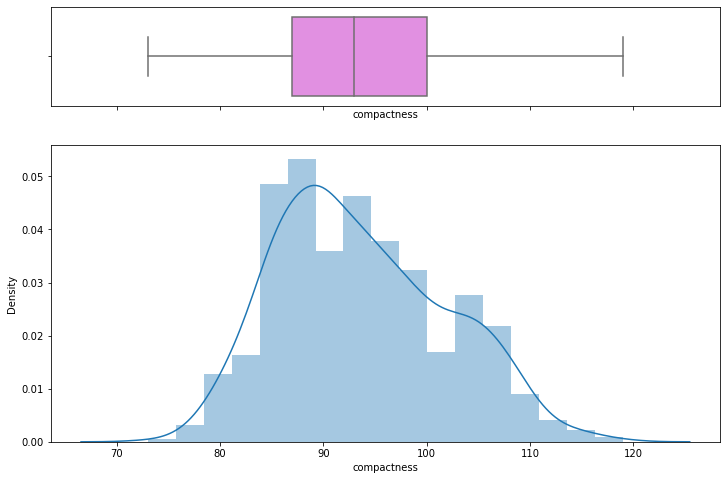

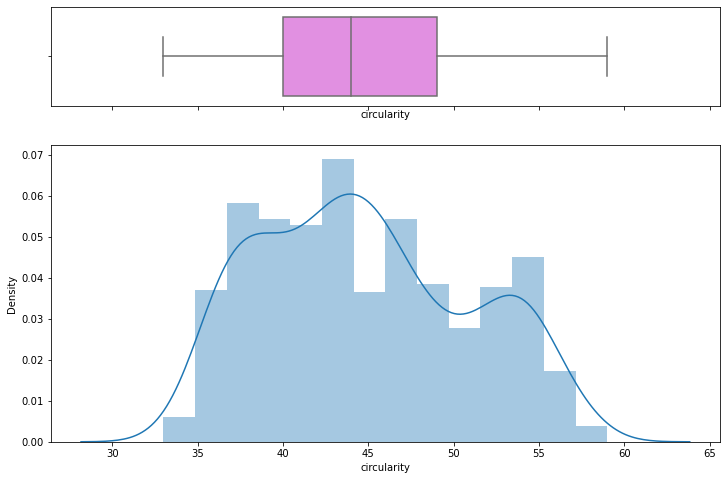

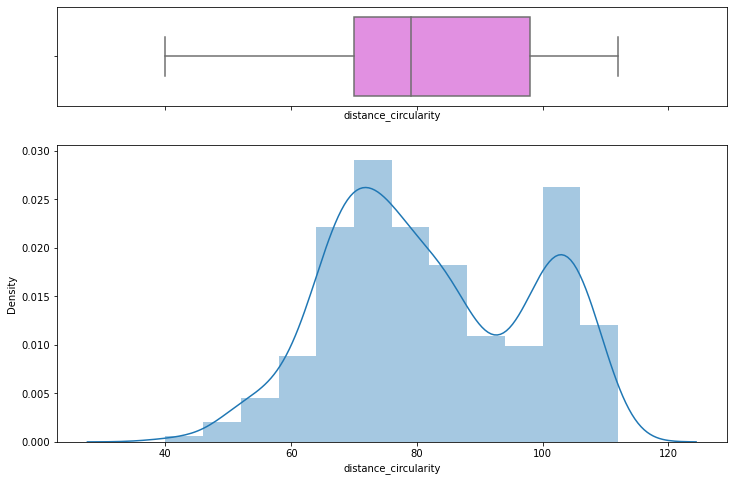

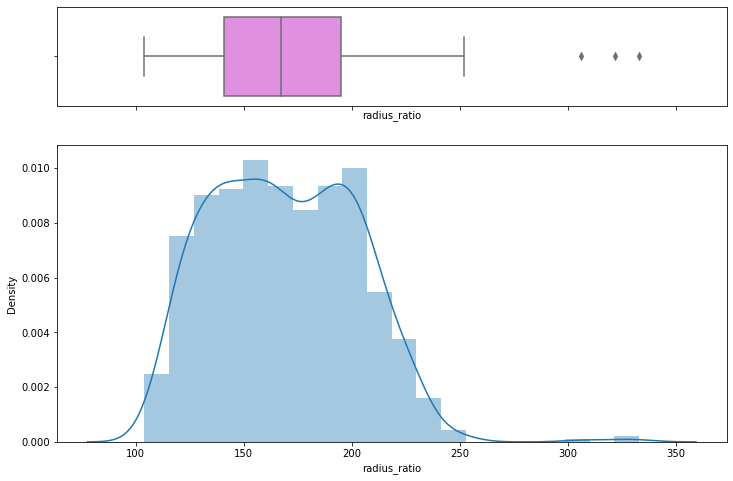

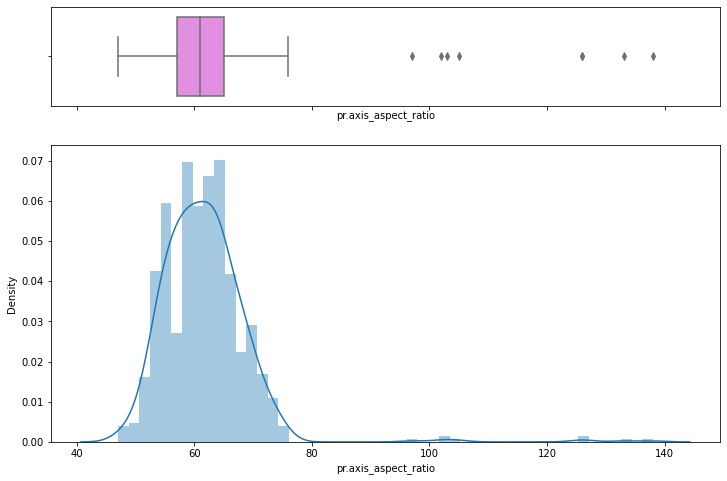

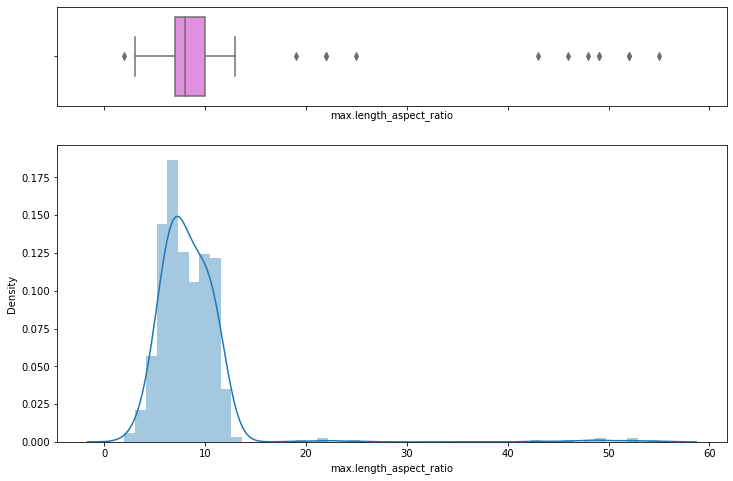

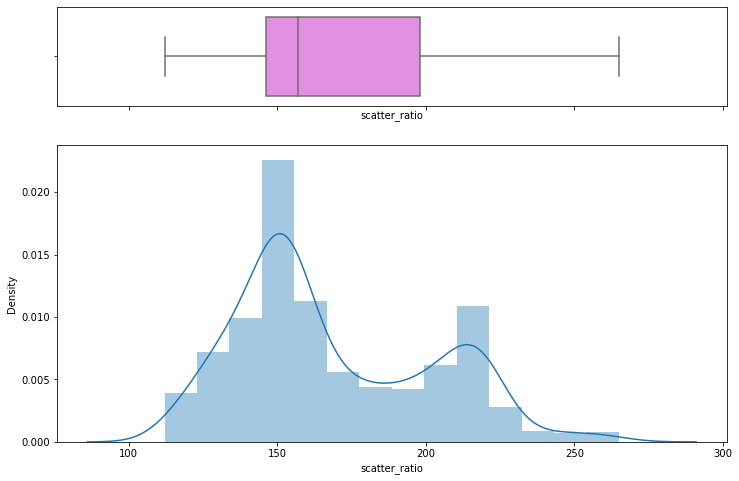

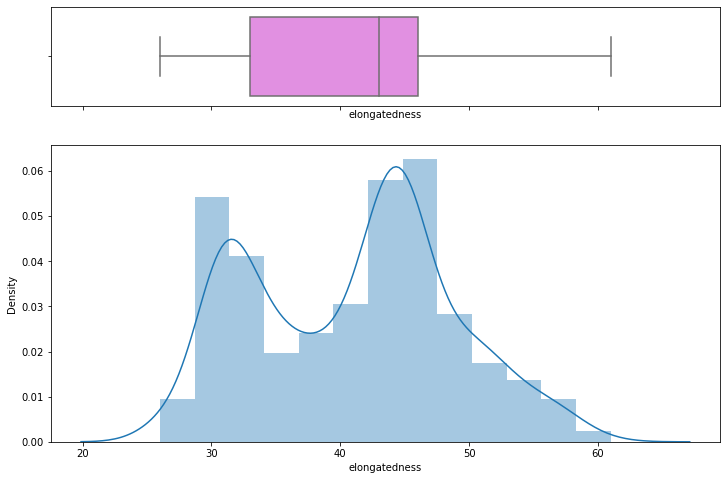

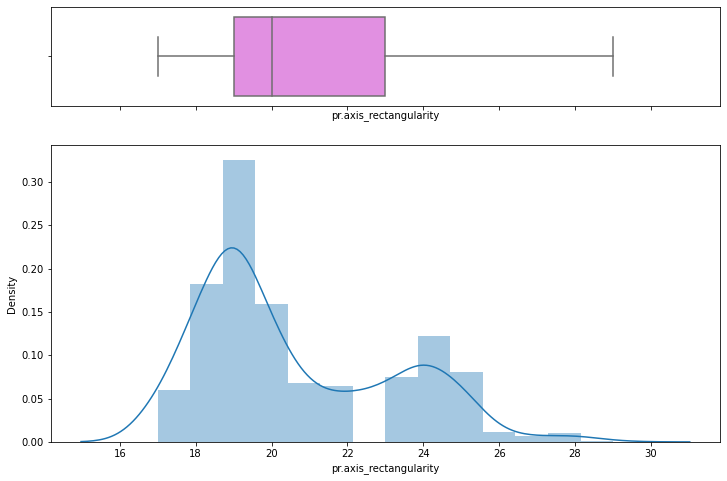

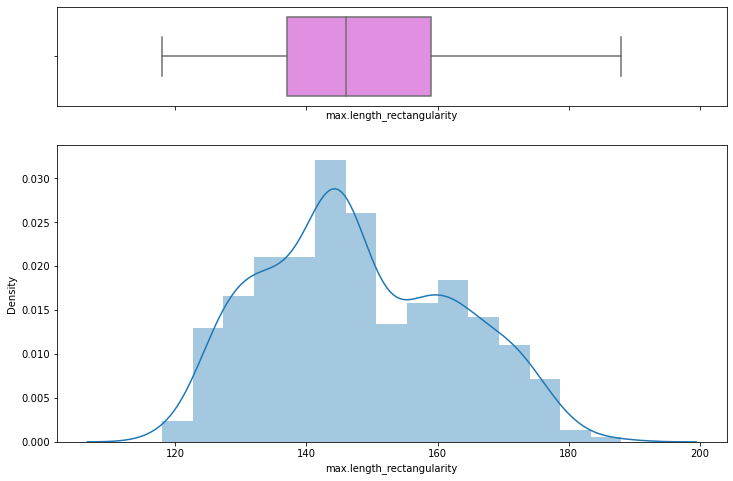

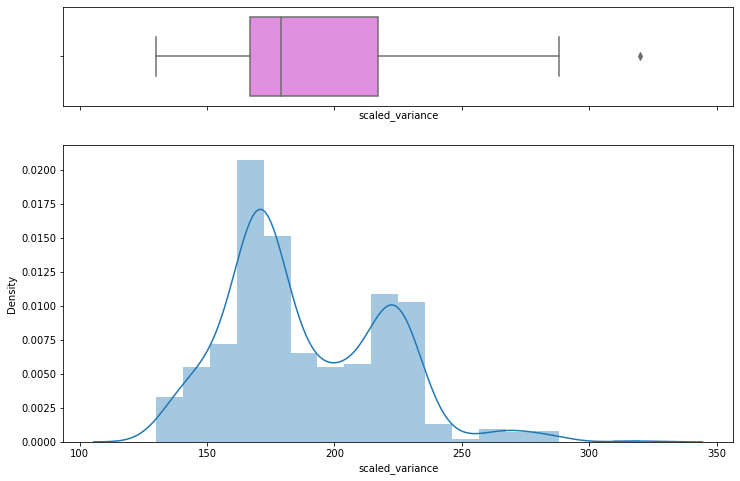

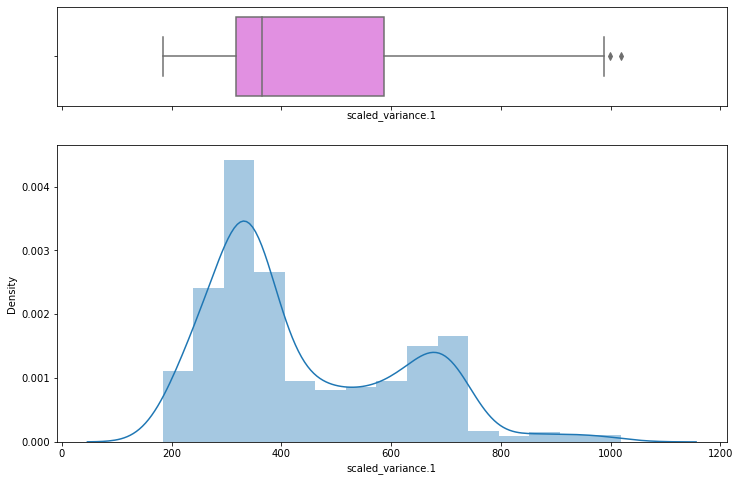

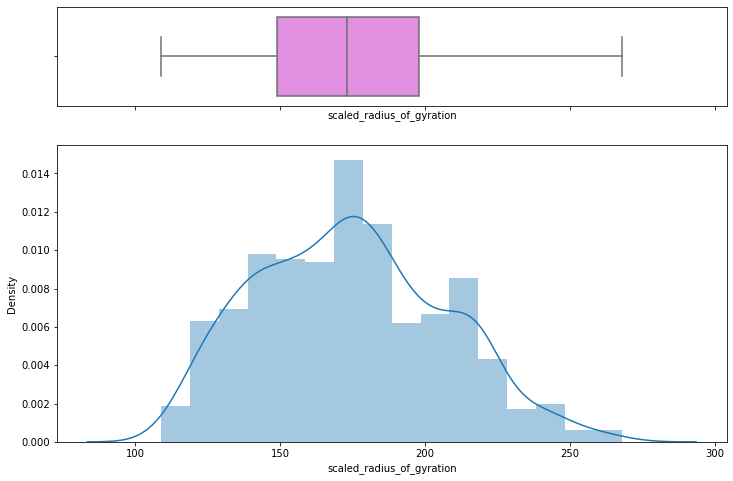

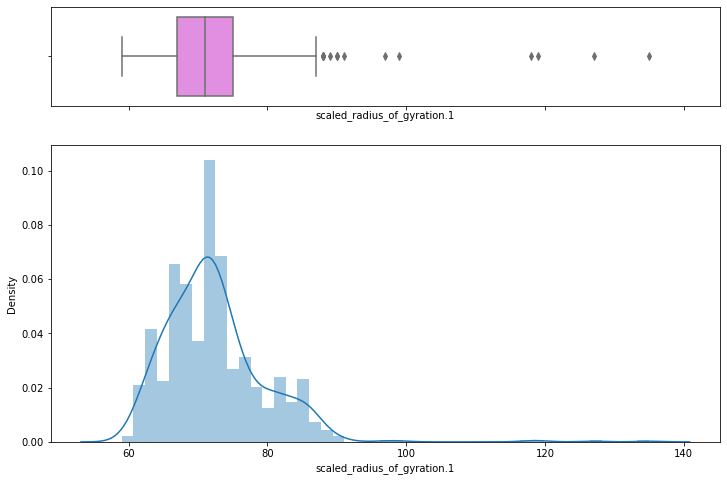

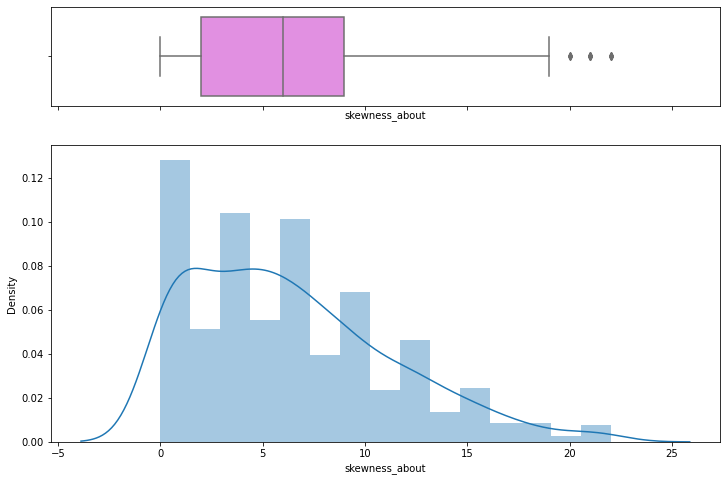

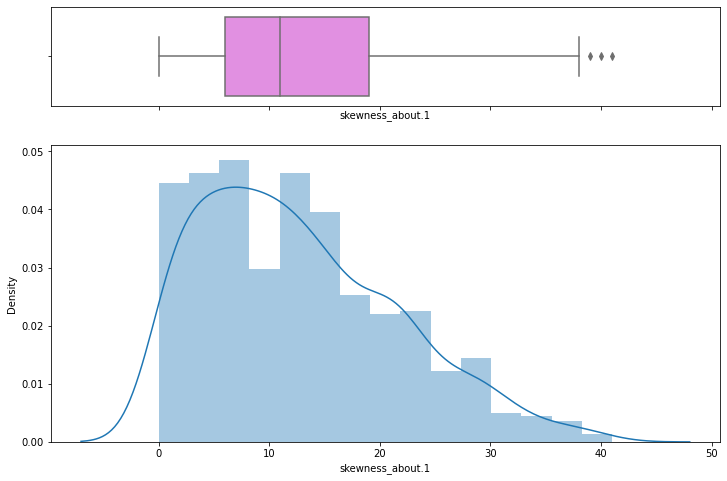

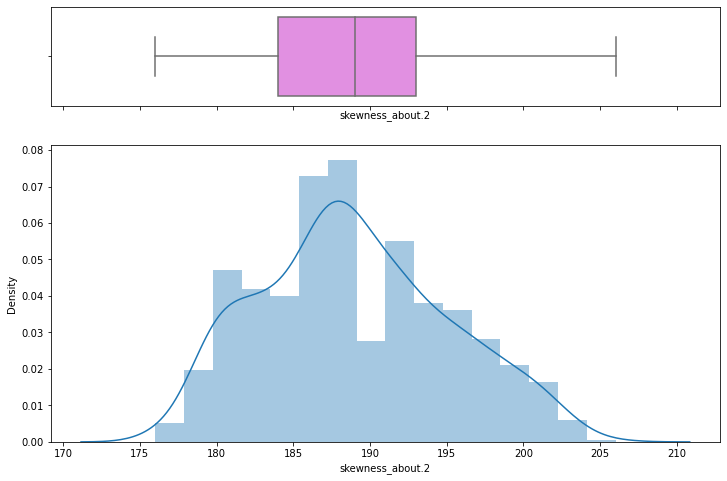

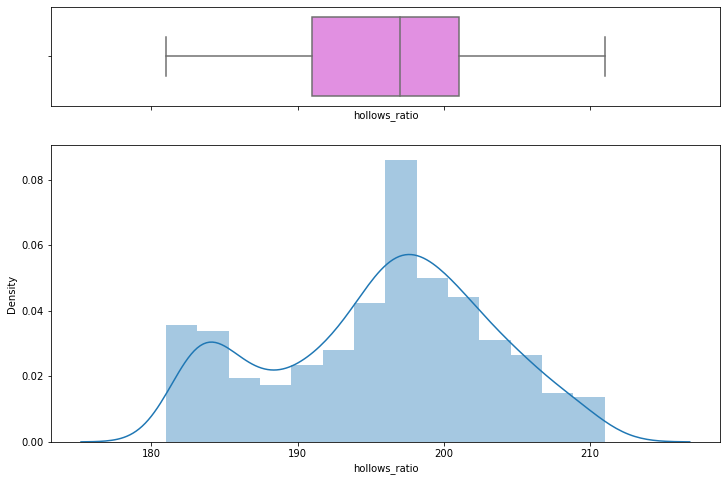

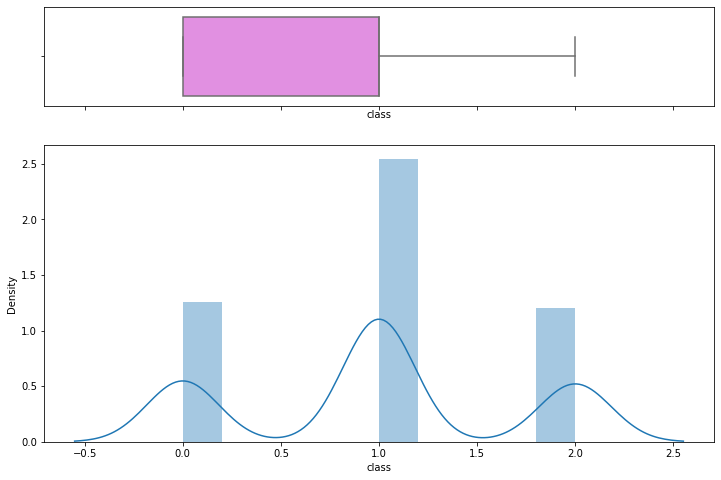

In [53]:
col = list (df.columns)
for column in col:
        print (histogram_boxplot(df[column]))

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


## Observations based on Histogram, Boxplot, and 5 point summary:

#### compactness, circlularity, scatter_ratio, elongatedness,  scaled_radius_of_gyration, skewness_about.1, hollows_ratio follows NORMAL DISTRIBUTION.

#### Slight left skewness can be seen in distance_circularity

#### radius_ratio, pr.axis_aspect_ratio, max.length_rectangularity, scaled_variance, pr.axis_aspect_ratio, skewness_about.1, follows right Skewed distribution.

In [55]:
df.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.689885,0.789955,0.688130,0.090557,0.150369,0.814026,-0.788051,0.814227,0.674902,0.764386,0.820240,0.581405,-0.258437,0.231648,0.168384,0.296195,0.372806,-0.037391
circularity,0.689885,1.000000,0.797704,0.623950,0.155023,0.251619,0.858149,-0.825108,0.856137,0.965366,0.806108,0.850932,0.935594,0.049070,0.141726,-0.001975,-0.113902,0.049331,-0.161018
distance_circularity,0.789955,0.797704,1.000000,0.771404,0.163386,0.265591,0.909023,-0.912713,0.897261,0.773459,0.865683,0.891789,0.705689,-0.238145,0.110280,0.277851,0.145258,0.343228,-0.067445
radius_ratio,0.688130,0.623950,0.771404,1.000000,0.667375,0.452460,0.743470,-0.795761,0.716210,0.570478,0.806788,0.731773,0.544636,-0.175348,0.044693,0.178079,0.375591,0.470895,-0.199219
pr.axis_aspect_ratio,0.090557,0.155023,0.163386,0.667375,1.000000,0.652093,0.113696,-0.191193,0.086992,0.133553,0.290375,0.100668,0.135663,0.173060,-0.059244,-0.040769,0.229702,0.257566,-0.114292
max.length_aspect_ratio,0.150369,0.251619,0.265591,0.452460,0.652093,1.000000,0.171445,-0.183242,0.167514,0.309180,0.331124,0.150069,0.197179,0.308329,0.016461,0.041210,-0.030543,0.139283,0.202235
scatter_ratio,0.814026,0.858149,0.909023,0.743470,0.113696,0.171445,1.000000,-0.973413,0.991992,0.808154,0.950067,0.996396,0.795748,-0.045632,0.070118,0.227375,0.009967,0.138424,-0.287590
elongatedness,-0.788051,-0.825108,-0.912713,-0.795761,-0.191193,-0.183242,-0.973413,1.000000,-0.950345,-0.771099,-0.937846,-0.956858,-0.761563,0.119750,-0.046621,-0.201325,-0.117568,-0.233408,0.342712
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.716210,0.086992,0.167514,0.991992,-0.950345,1.000000,0.811979,0.935653,0.992119,0.792895,-0.033769,0.078701,0.231171,-0.017383,0.117202,-0.255354
max.length_rectangularity,0.674902,0.965366,0.773459,0.570478,0.133553,0.309180,0.808154,-0.771099,0.811979,1.000000,0.744760,0.796230,0.865240,0.031098,0.130356,0.013045,-0.108019,0.086792,-0.025539


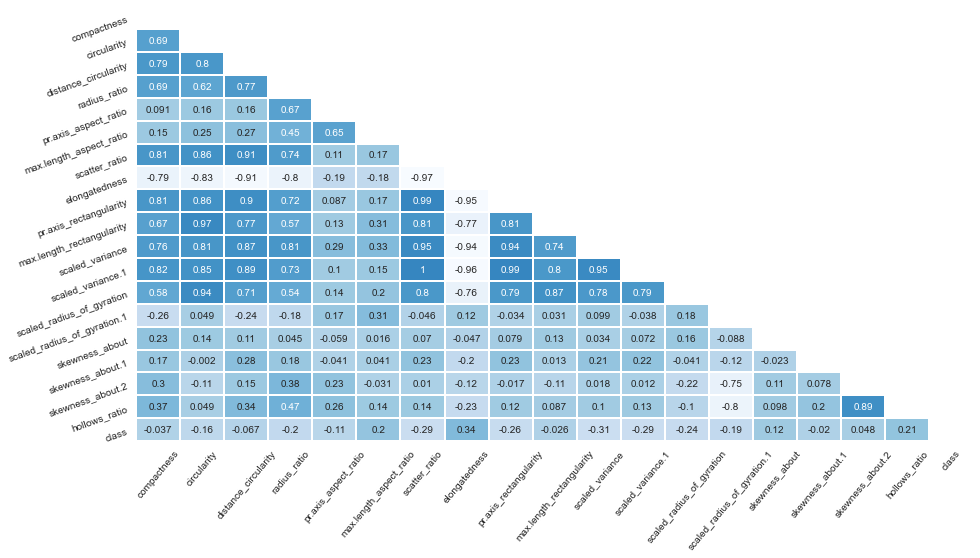

In [56]:
corr = df.corr() 
lower_triangle = np.tril(corr, k = -1)
mask = lower_triangle == 0

plt.figure(figsize = (15,8))
sns.set_style(style = 'white')
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)
plt.xticks(rotation = 50)
plt.yticks(rotation = 20)
plt.show()

#### Heatmap shows there are many features which are correlated, and can be dropped. 
#### We can use PCA to analyse which features to drop. 

In [57]:
X = df.drop(columns='class')
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)


In [58]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))


0.9806678383128296
0.9754098360655737


In [59]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[ 59   0   1]
 [  3 127   1]
 [  0   1  52]]


## Dimensional reduction

In [60]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [61]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00123153  0.69073497  0.79092746  0.68897729  0.09066804  0.1505537
   0.81502868 -0.78902127  0.81522961  0.67573322  0.76532752  0.82125027
   0.58212123 -0.25875528  0.23193313  0.16859183  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.62471862  0.15521415  0.25192897
   0.85920548 -0.8261242   0.85719089  0.96655501  0.80710097  0.85197956
   0.93674669  0.0491303   0.1419004  -0.00197723 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.77235395  0.16358689  0.26591783
   0.91014241 -0.9138366   0.89836576  0.77441118  0.86674929  0.89288735
   0.70655787 -0.23843852  0.11041593  0.278193    0.14543699  0.34365085]
 [ 0.68897729  0.62471862  0.77235395  1.00123153  0.66819724  0.45301698
   0.74438595 -0.79674104  0.71709175  0.57118076  0.80778118  0.73267385
   0.54530637 -0.17556405  0.04474816  0.17829807  0.37605357  0.47147529]
 [ 0.09066804  0.15521415  0.16358689  0.66819724  1.00123153  0.6528959
   0.11383635 -0.19142882  0.0870987

In [62]:
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(n_components=6)

In [63]:
print(pca.explained_variance_)


[9.453387   2.98961888 1.91768721 1.17011696 0.92909452 0.5321711 ]


In [64]:
print(pca.components_)

[[ 0.27444743  0.2940036   0.30438022  0.2688886   0.08301999  0.09848255
   0.31668895 -0.31320505  0.31361223  0.28128567  0.30916156  0.31416351
   0.27033732 -0.02560369  0.03967995  0.06316001  0.03094103  0.07936613]
 [-0.12710599  0.13443032 -0.07214484 -0.17641625 -0.09876335  0.03020685
   0.04438994  0.01525397  0.0572306   0.12032438  0.06190968  0.0480211
   0.2101697   0.4937938  -0.05626019 -0.12103543 -0.5444917  -0.53888165]
 [-0.11577823 -0.03645135 -0.05518816  0.28180454  0.64576888  0.58641235
  -0.09858482  0.05665152 -0.11203925 -0.02413247  0.05972347 -0.10945278
  -0.0370631   0.27577954 -0.11019178 -0.08049935  0.031728    0.05694625]
 [ 0.08007664  0.19034213 -0.06937098 -0.04465056  0.03005322  0.0297503
  -0.09441724  0.08506744 -0.09189742  0.19229389 -0.11947568 -0.09131759
   0.20488676 -0.07153305  0.60508283 -0.66205849  0.10185349  0.05157949]
 [ 0.07019718 -0.08667268  0.03895903 -0.04366333 -0.03846815  0.212001
  -0.01701595  0.07582276  0.00073933 

In [65]:
print(pca.explained_variance_ratio_)

[0.52454218 0.16588564 0.10640714 0.06492654 0.05155287 0.0295287 ]


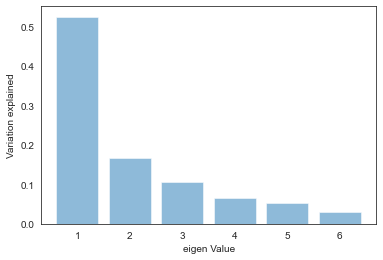

In [66]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

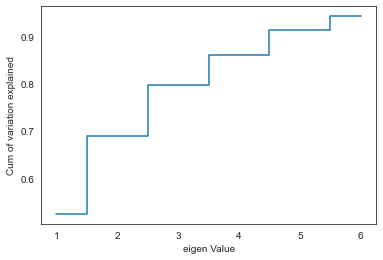

In [67]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Here we can see that 4 variables explain almost 90% of the variation in the original data. So we can keep 4 variables.



In [68]:
pca4 = PCA(n_components=4)
pca4.fit(XScaled)
print(pca4.components_)
print(pca4.explained_variance_ratio_)
Xpca4 = pca4.transform(XScaled)

[[ 0.27444743  0.2940036   0.30438022  0.2688886   0.08301999  0.09848255
   0.31668895 -0.31320505  0.31361223  0.28128567  0.30916156  0.31416351
   0.27033732 -0.02560369  0.03967995  0.06316001  0.03094103  0.07936613]
 [-0.12710599  0.13443032 -0.07214484 -0.17641625 -0.09876335  0.03020685
   0.04438994  0.01525397  0.0572306   0.12032438  0.06190968  0.0480211
   0.2101697   0.4937938  -0.05626019 -0.12103543 -0.5444917  -0.53888165]
 [-0.11577823 -0.03645135 -0.05518816  0.28180454  0.64576888  0.58641235
  -0.09858482  0.05665152 -0.11203925 -0.02413247  0.05972347 -0.10945278
  -0.0370631   0.27577954 -0.11019178 -0.08049935  0.031728    0.05694625]
 [ 0.08007664  0.19034213 -0.06937098 -0.04465056  0.03005322  0.0297503
  -0.09441724  0.08506744 -0.09189742  0.19229389 -0.11947568 -0.09131759
   0.20488676 -0.07153305  0.60508283 -0.66205849  0.10185349  0.05157949]]
[0.52454218 0.16588564 0.10640714 0.06492654]


In [69]:
Xpca4

array([[ 0.35224921, -0.14102681,  0.96183193,  0.1908716 ],
       [-1.5780723 , -0.4221973 , -0.36526142,  0.23933356],
       [ 3.78255625,  0.25325744,  0.06175618,  1.21641553],
       ...,
       [ 4.83112974,  0.07323619,  0.48997353,  0.31789644],
       [-3.26941568, -1.01866536, -0.34344083, -1.92725627],
       [-4.75521696,  0.30767001, -0.58216391, -1.22627729]])

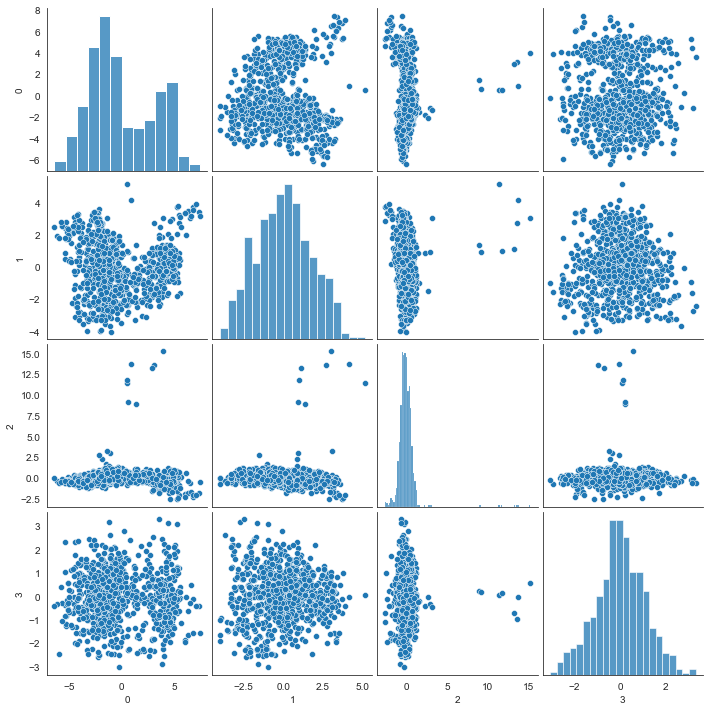

In [70]:
sns.pairplot(pd.DataFrame(Xpca4))


In [71]:
regression_model = LinearRegression()
regression_model.fit(XScaled, y)
regression_model.score(XScaled, y)

0.6811300989284906

In [72]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca4, y)
regression_model_pca.score(Xpca4, y)

0.105897750891354

#### By using reduced data we can get better results in Linear Regression model.

# PART 4

In [73]:
data = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')
data.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [74]:
data.shape

(180, 7)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


#### Out of 180, 90 are missing values. We have to drop all the missing variables, as the whole rows are missing. 

In [76]:
data = data.dropna()

In [77]:
data.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0


In [78]:
data.reset_index(drop=True,inplace=True)
data.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [79]:
X = data.drop(columns='Name')
y = data['Name']

In [80]:
data.dtypes

Name      object
Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

None
None
None
None
None
None


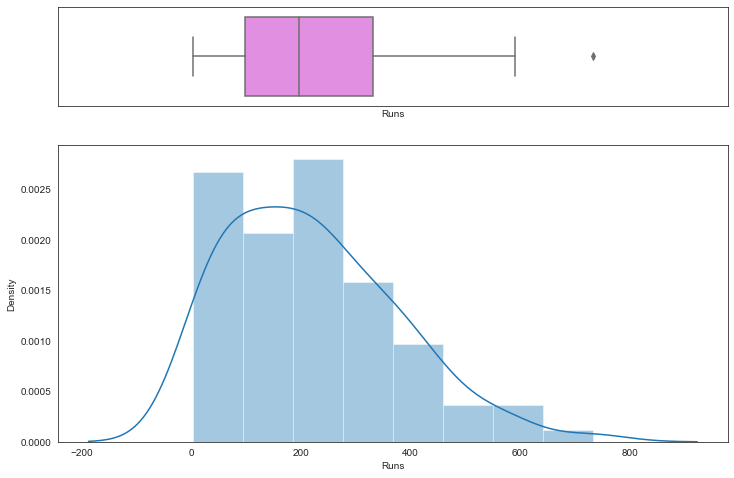

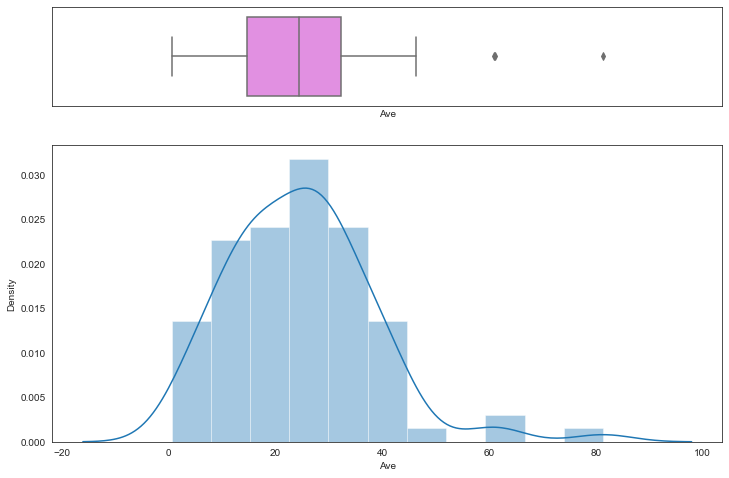

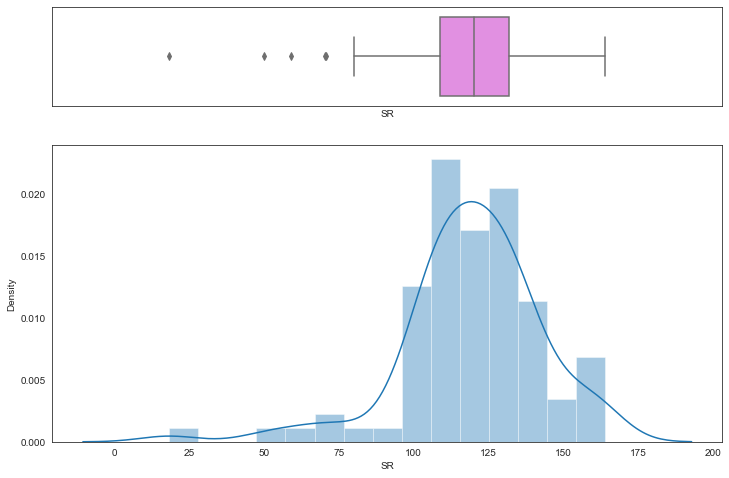

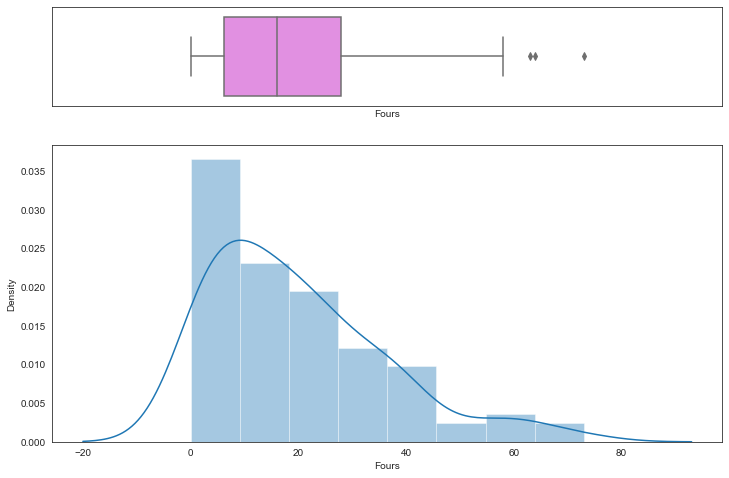

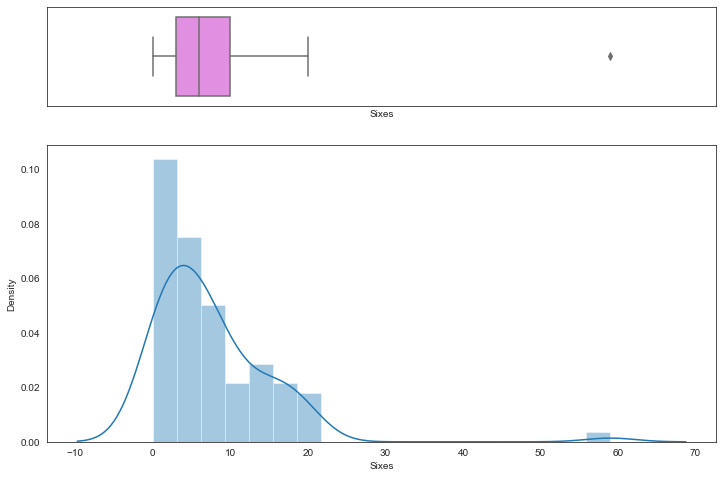

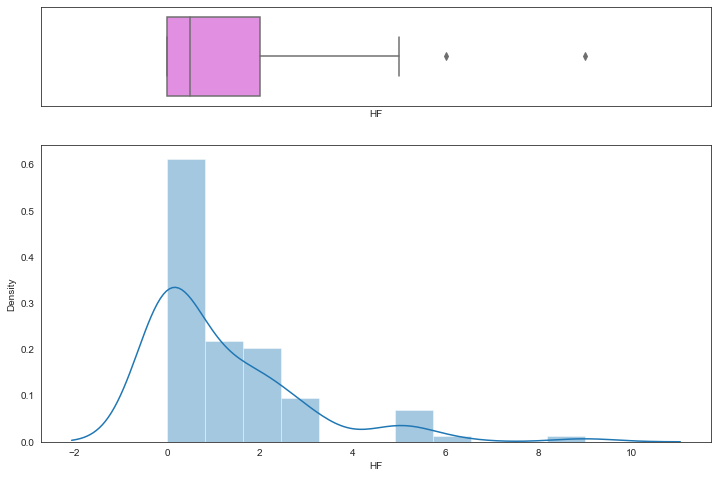

In [81]:
col = list (data.columns)
for column in col:
    if data[column].dtypes == 'float64':
        print (histogram_boxplot(data[column]))

#### Most of the players have scored around 200 runs, a few players have scored nearly 700.
#### Most of the players have the average of 30 runs, with a few having around 80 as average. 
#### Average strike rate is around 110, with a few with strike rate of 160
#### Most of the players have scored around 10 boundaries, with a few scoring nearly 70. 
#### Most of the players have scored less than 20 sixed, with some outlier scoring around 55
#### Most of the players have scored 0-1 Half centuries, with a few nearing 8-9.

In [82]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


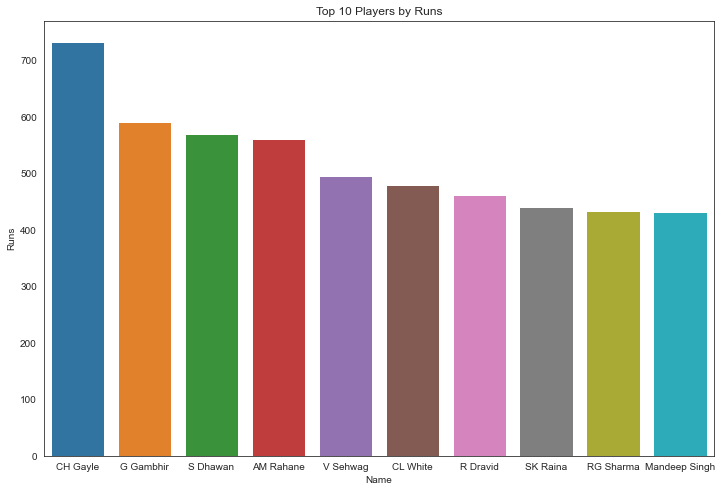

In [83]:
plt.figure(figsize=(12,8))
data1=data.groupby('Name')['Runs'].sum().sort_values(ascending = False ).head(10)
data1= data1.reset_index() 
data1.columns = ['Name' ,'Runs']
sns.barplot(data= data1 , x= 'Name' , y ='Runs');
plt.title("Top 10 Players by Runs");

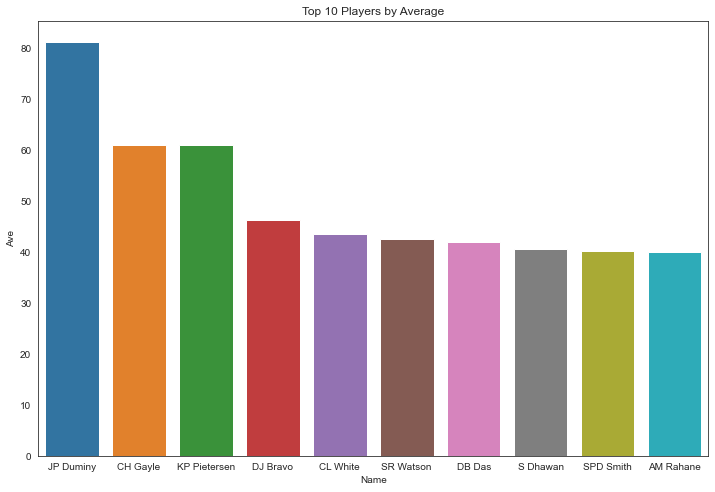

In [84]:
plt.figure(figsize=(12,8))
data1=data.groupby('Name')['Ave'].sum().sort_values(ascending = False ).head(10)
data1= data1.reset_index() 
data1.columns = ['Name' ,'Ave']
sns.barplot(data= data1 , x= 'Name' , y ='Ave');
plt.title("Top 10 Players by Average");

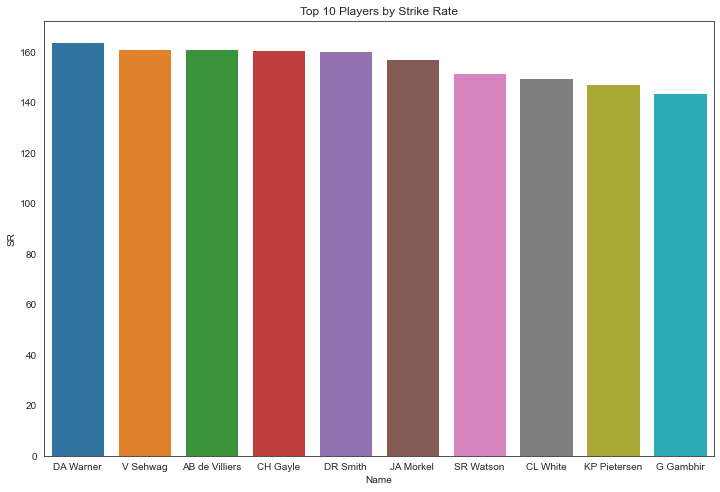

In [85]:
plt.figure(figsize=(12,8))
data1=data.groupby('Name')['SR'].sum().sort_values(ascending = False ).head(10)
data1= data1.reset_index() 
data1.columns = ['Name' ,'SR']
sns.barplot(data= data1 , x= 'Name' , y ='SR');
plt.title("Top 10 Players by Strike Rate");

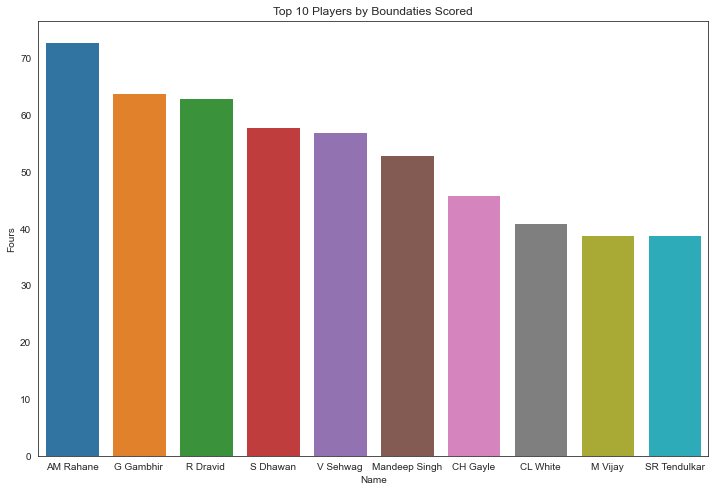

In [86]:
plt.figure(figsize=(12,8))
data1=data.groupby('Name')['Fours'].sum().sort_values(ascending = False ).head(10)
data1= data1.reset_index() 
data1.columns = ['Name' ,'Fours']
sns.barplot(data= data1 , x= 'Name' , y ='Fours');
plt.title("Top 10 Players by Boundaties Scored");

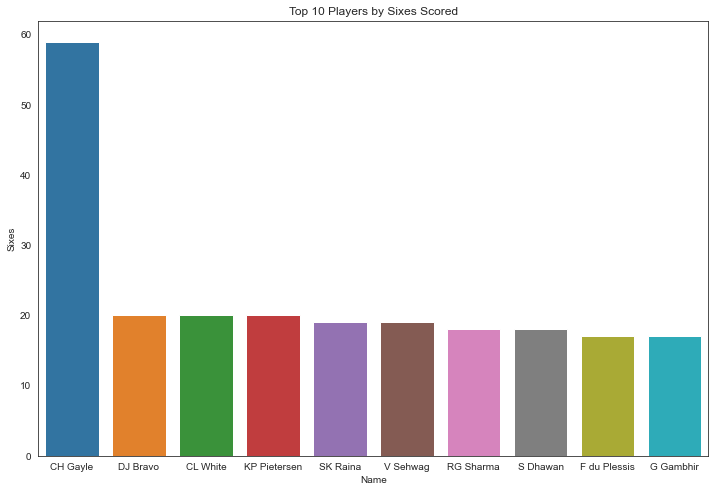

In [87]:
plt.figure(figsize=(12,8))
data1=data.groupby('Name')['Sixes'].sum().sort_values(ascending = False ).head(10)
data1= data1.reset_index() 
data1.columns = ['Name' ,'Sixes']
sns.barplot(data= data1 , x= 'Name' , y ='Sixes');
plt.title("Top 10 Players by Sixes Scored");

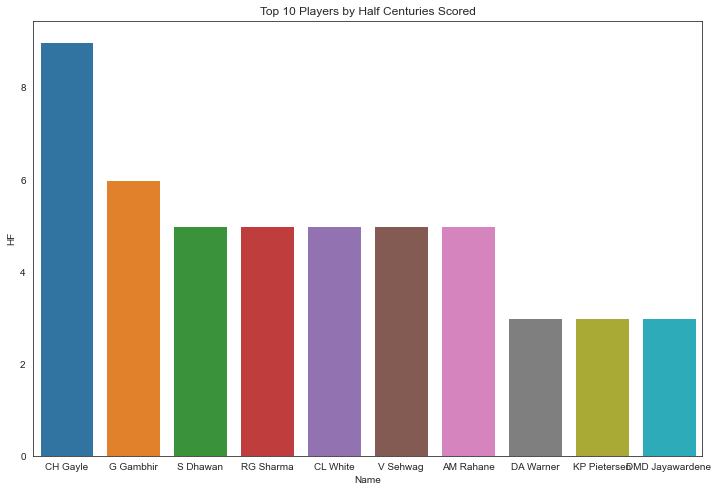

In [88]:
plt.figure(figsize=(12,8))
data1=data.groupby('Name')['HF'].sum().sort_values(ascending = False ).head(10)
data1= data1.reset_index() 
data1.columns = ['Name' ,'HF']
sns.barplot(data= data1 , x= 'Name' , y ='HF');
plt.title("Top 10 Players by Half Centuries Scored");

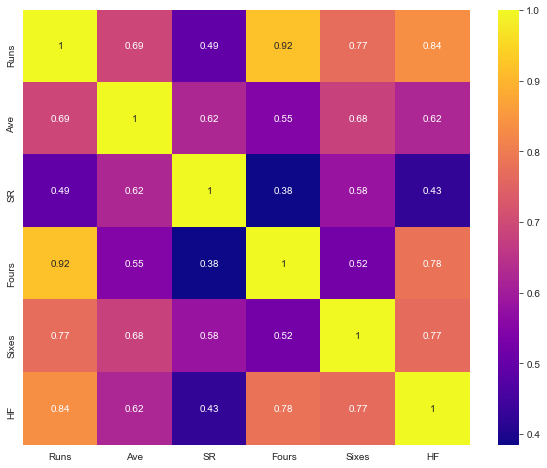

In [89]:
plt.figure(figsize=(10,8))
corr=data.drop(columns='Name').corr()
sns.heatmap(corr,annot=True, cmap = 'plasma' );

#### All of the variables have at least 0.4 Correlation. with majority having high correlation. 

In [90]:
data_attr = data.iloc[:,1:7]
data_scaled = data_attr.apply(zscore)
data_scaled.head(10)

,Runs,Ave,SR,Fours,Sixes,HF
0,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
1,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
2,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
3,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
4,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533
5,2.188568,1.127500,0.432136,3.262788,0.304422,2.269533
6,0.547464,2.678077,1.197712,0.135580,1.561209,1.078525
7,1.371234,0.457059,0.316088,1.177983,1.309851,2.269533
8,0.637564,1.117901,1.783053,0.380852,0.932815,1.078525
9,0.154886,4.179184,0.393453,-0.416280,0.430100,0.483020


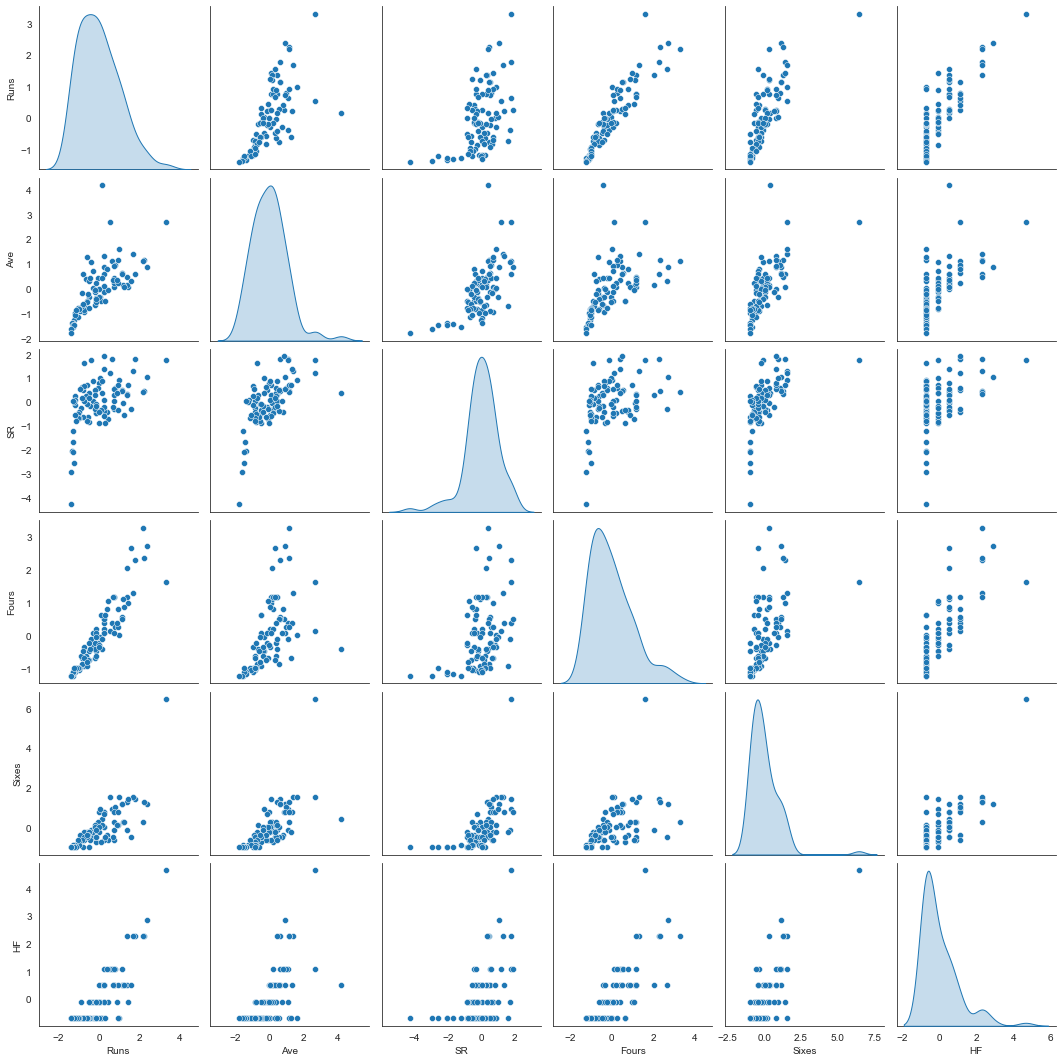

In [91]:
sns.pairplot(data_scaled, diag_kind='kde')

#### By the pairplot we can assume that we can divide the data into 1 major cluster, and 2 minor clusters. Let's find out.

Text(0.5, 1.0, 'Selecting K model with Elbow Method')

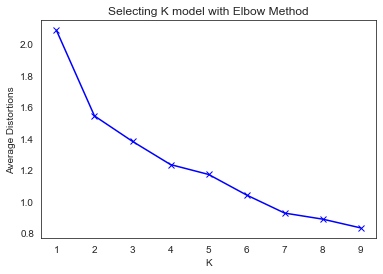

In [92]:
clusters = range(1,10)
meanDist = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit (data_scaled)
    prediction = model.predict(data_scaled)
    meanDist.append(sum(np.min(cdist(data_scaled, model.cluster_centers_, 'euclidean'),axis=1))/data_scaled.shape[0])

plt.plot(clusters, meanDist, 'bx-')
plt.xlabel('K')
plt.ylabel('Average Distortions')
plt.title('Selecting K model with Elbow Method')

#### We can see a slight elbow at 4. We shall go with 4 and divide the players in 4 categories. 

In [93]:
final_model = KMeans(4, random_state=2)
final_model.fit(data_scaled)
prediction = final_model.predict(data_scaled)

data ['Ranking_Clusters'] = prediction
print ('Groups assigned : \n')

data.head(10)

Groups assigned : 



,Name,Runs,Ave,SR,Fours,Sixes,HF,Ranking_Clusters
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1
5,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,1
6,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,2
7,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,1
8,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,2
9,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,2


In [94]:
data.Ranking_Clusters.value_counts().sort_index()


0    21
1     7
2    27
3    35
Name: Ranking_Clusters, dtype: int64

In [95]:
clusterinfo=data.iloc[:,0:9].groupby('Ranking_Clusters').mean()
clusterinfo['Freq']=data.Ranking_Clusters.value_counts().sort_index()
clusterinfo

,Runs,Ave,SR,Fours,Sixes,HF,Freq
Ranking_Clusters,,,,,,,
0,44.857143,9.394762,94.039048,3.761905,0.809524,0.047619,21
1,551.285714,40.864286,142.962857,54.000000,23.000000,5.714286,7
2,336.703704,34.704074,127.669259,30.962963,11.185185,2.000000,27
3,168.628571,23.009714,122.918286,13.942857,5.771429,0.342857,35


#### We can see that Cluster 3 have the highest Runs, Average, Strike Rate, Fours, Sixes, and Half Centuries. Cluster 3 contains the best players. followed by 0, 1, and 2 respectively. 

#### We shall renaname the clusters to get better understanding. 
#### 1 = Grade 1
#### 2 = Grade 2 
#### 3 = Grade 3
#### 0 = Grade 4

In [96]:
data['Ranking_Clusters'] = data['Ranking_Clusters'].replace({1: 'Grade 1', 
                                                             2: 'Grade 2',
                                                             3: 'Grade 3', 
                                                             0: 'Grade 4'})

In [97]:
Grade_1 = data[data['Ranking_Clusters'] == 'Grade 1']
Grade_1.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Ranking_Clusters
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade 1
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade 1
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade 1
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade 1
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade 1
5,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,Grade 1
7,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,Grade 1


In [98]:
Grade_2 = data[data['Ranking_Clusters'] == 'Grade 2']
Grade_2.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Ranking_Clusters
6,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,Grade 2
8,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,Grade 2
9,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,Grade 2
10,DA Warner,256.0,36.57,164.10,28.0,14.0,3.0,Grade 2
11,SR Watson,255.0,42.50,151.78,26.0,14.0,2.0,Grade 2
12,F du Plessis,398.0,33.16,130.92,29.0,17.0,3.0,Grade 2
13,OA Shah,340.0,37.77,132.81,24.0,16.0,3.0,Grade 2
14,DJ Bravo,371.0,46.37,140.53,20.0,20.0,0.0,Grade 2
15,DJ Hussey,396.0,33.00,129.83,28.0,17.0,2.0,Grade 2
16,SK Raina,441.0,25.94,135.69,36.0,19.0,1.0,Grade 2


In [99]:
Grade_3 = data[data['Ranking_Clusters'] == 'Grade 3']
Grade_3.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Ranking_Clusters
20,DR Smith,157.0,39.25,160.20,18.0,7.0,1.0,Grade 3
29,MA Agarwal,225.0,20.45,142.40,19.0,15.0,1.0,Grade 3
34,MS Bisla,213.0,30.42,133.12,16.0,10.0,1.0,Grade 3
36,BJ Hodge,245.0,30.62,140.00,18.0,9.0,0.0,Grade 3
37,NV Ojha,255.0,23.18,113.83,21.0,13.0,1.0,Grade 3
38,DB Das,126.0,42.00,135.48,9.0,6.0,0.0,Grade 3
39,AC Gilchrist,172.0,34.40,120.27,21.0,4.0,1.0,Grade 3
41,IK Pathan,176.0,25.14,139.68,14.0,6.0,0.0,Grade 3
42,Azhar Mahmood,186.0,23.25,130.98,16.0,8.0,0.0,Grade 3
43,MK Pandey,143.0,20.42,127.67,12.0,6.0,1.0,Grade 3


In [100]:
Grade_4 = data[data['Ranking_Clusters'] == 'Grade 4']
Grade_4.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Ranking_Clusters
69,N Saini,140.0,14.00,99.29,16.0,0.0,1.0,Grade 4
70,MN Samuels,124.0,17.71,100.81,7.0,5.0,0.0,Grade 4
71,MJ Clarke,98.0,16.33,104.25,12.0,0.0,0.0,Grade 4
72,R Bhatia,35.0,11.66,125.00,4.0,0.0,0.0,Grade 4
73,R Vinay Kumar,68.0,13.60,109.67,3.0,2.0,0.0,Grade 4
74,P Kumar,35.0,11.66,116.66,2.0,1.0,0.0,Grade 4
75,J Botha,58.0,14.50,107.40,4.0,1.0,0.0,Grade 4
76,A Ashish Reddy,35.0,8.75,120.68,3.0,1.0,0.0,Grade 4
77,DL Vettori,31.0,7.75,119.23,3.0,1.0,0.0,Grade 4
78,SP Goswami,69.0,13.80,102.98,4.0,1.0,0.0,Grade 4


In [101]:
data.head(100)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Ranking_Clusters
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade 1
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade 1
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade 1
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade 1
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade 1
...,...,...,...,...,...,...,...,...
85,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0,Grade 4
86,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0,Grade 4
87,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0,Grade 4
88,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0,Grade 4


# PART 4 2ND APPROACH - RANKING SYSTEM

In [102]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,Runs,Ave,SR,Fours,Sixes,HF
0,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
1,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
2,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
3,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
4,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


In [103]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [104]:
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(n_components=6)

In [105]:
print(pca.explained_variance_ratio_)

[0.70911996 0.13784566 0.06867133 0.05424458 0.02730624 0.00281223]


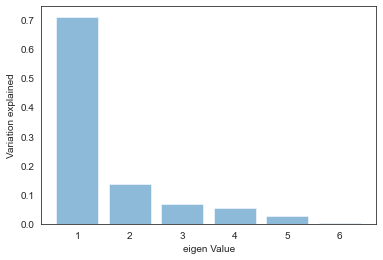

In [106]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

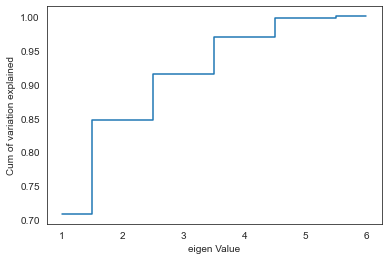

In [107]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### We can see that with 4 variables we are getting around 97% variation explained. We can build the model using 4 PCAs.

In [108]:
pca4 = PCA(n_components=4)
pca4.fit(XScaled)
print(pca4.components_)
print('')
print(pca4.explained_variance_ratio_)
Xpca4 = pca4.transform(XScaled)

[[ 0.4582608   0.39797313  0.3253838   0.40574167  0.41733459  0.43237178]
 [ 0.26643209 -0.33111756 -0.69780334  0.47355804 -0.17902455  0.27593225]
 [-0.10977942  0.00550486 -0.45013448 -0.50823538  0.66942589  0.28082541]
 [-0.00520142  0.84736307 -0.43275029 -0.03252305 -0.24878157 -0.17811777]]

[0.70911996 0.13784566 0.06867133 0.05424458]


In [109]:
0.4582608*0.70911996

0.32496188016556804

In [110]:
eigen = pd.DataFrame(Xpca4)
eigen.head()

,0,1,2,3
0,8.516774,-0.354575,3.672474,-0.996267
1,4.618340,1.476730,-0.503630,-0.594494
2,4.142251,0.471438,-0.557204,-1.101184
3,3.899411,0.041816,0.262143,-0.228085
4,4.120072,1.401002,-0.116643,-0.014712


In [111]:
eigen["sum"] = eigen. sum(axis=1)
eigen.head()

,0,1,2,3,sum
0,8.516774,-0.354575,3.672474,-0.996267,10.838406
1,4.618340,1.476730,-0.503630,-0.594494,4.996945
2,4.142251,0.471438,-0.557204,-1.101184,2.955301
3,3.899411,0.041816,0.262143,-0.228085,3.975285
4,4.120072,1.401002,-0.116643,-0.014712,5.389718


In [112]:
data['Sum Eigen Vector'] = eigen["sum"]

In [113]:
data.sort_values(by='Sum Eigen Vector', ascending = False)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Ranking_Clusters,Sum Eigen Vector
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade 1,10.838406
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade 1,5.389718
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade 1,4.996945
5,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,Grade 1,4.974729
9,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,Grade 2,3.978450
...,...,...,...,...,...,...,...,...,...
76,A Ashish Reddy,35.0,8.75,120.68,3.0,1.0,0.0,Grade 4,-3.359192
77,DL Vettori,31.0,7.75,119.23,3.0,1.0,0.0,Grade 4,-3.365424
72,R Bhatia,35.0,11.66,125.00,4.0,0.0,0.0,Grade 4,-3.454153
81,R Ashwin,18.0,6.00,120.00,2.0,0.0,0.0,Grade 4,-3.679940


In [114]:
data.reset_index(drop=True, inplace=True)
data.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,Ranking_Clusters,Sum Eigen Vector
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade 1,10.838406
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade 1,4.996945
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade 1,2.955301
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade 1,3.975285
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade 1,5.389718


In [115]:
num = np.arange(1,91)
Rank = pd.DataFrame(num,columns=['Rank'])

In [116]:
data = pd.concat ([Rank, data], axis=1, sort=True, )

In [117]:
data= data.drop(columns='Sum Eigen Vector')
data.head(90)

,Rank,Name,Runs,Ave,SR,Fours,Sixes,HF,Ranking_Clusters
0,1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade 1
1,2,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade 1
2,3,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade 1
3,4,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade 1
4,5,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade 1
...,...,...,...,...,...,...,...,...,...
85,86,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0,Grade 4
86,87,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0,Grade 4
87,88,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0,Grade 4
88,89,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0,Grade 4


In [118]:
data.head(90)

,Rank,Name,Runs,Ave,SR,Fours,Sixes,HF,Ranking_Clusters
0,1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade 1
1,2,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade 1
2,3,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade 1
3,4,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade 1
4,5,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade 1
...,...,...,...,...,...,...,...,...,...
85,86,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0,Grade 4
86,87,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0,Grade 4
87,88,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0,Grade 4
88,89,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0,Grade 4


# PART 5

### All possible dimensionality reduction techniques that can be implemented using python

#### Missing Value Ratio
#### Low Variance Filter
#### High Correlation Filter
#### Random Forest
#### Backward Feature Elimination
#### Forward Feature Selection
#### Factor Analysis
#### Principal Component Analysis
#### Independent Component Analysis
#### Methods Based on Projections
#### t-Distributed Stochastic Neighbor Embedding (t-SNE)
#### UMAP

## QUES 2

In [119]:
# Yes, it is possible to use these techniques on images as well. 

In [120]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.image as mpimg


X = np.load('X.npy')
Y = np.load('Y.npy')

X.shape


(2062, 64, 64)

In [121]:
X.shape

(2062, 64, 64)

In [122]:
y.shape

(90,)

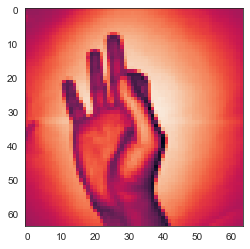

In [123]:
plt.imshow(X[0])


In [124]:
9 - np.argmax(Y[0])


9

In [125]:
X_flat = np.array(X).reshape((2062, 64*64))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)


In [126]:
X_flat.shape

(2062, 4096)

In [127]:
X_train.shape

(1443, 4096)

In [128]:
y_train.shape

(1443, 10)

In [129]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 20), random_state=1)

In [130]:
y_hat = clf.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, y_hat)))

accuracy: 0.3360258481421648


In [131]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [132]:
d

292

In [133]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [134]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (1443, 292)
recovered shape: (1443, 4096)


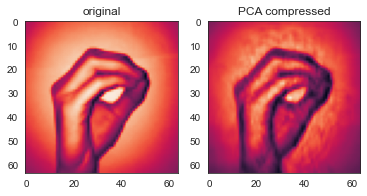

In [135]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[0].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)

## Trying to implement this on another image


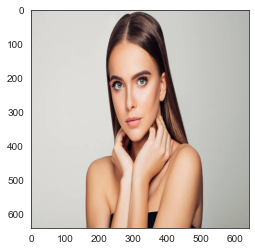

In [136]:
img = mpimg.imread('picture1.jpg')

plt.imshow(img)

In [137]:
img.shape

(640, 640, 3)

In [138]:
img_r = np.array(img).reshape((640, 1920))


(640, 32)
0.9770569442524533
(640, 1920)
(640, 1920)


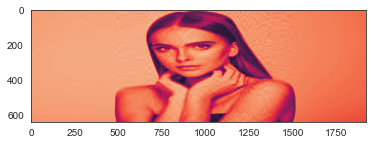

In [139]:
pca = PCA(32).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_) )

temp = pca.inverse_transform(img_transformed) 
print(temp.shape)
temp = np.reshape(temp, (640, 1920)) 
print(temp.shape) 
plt.imshow(temp)

#### We have compressed the image using PCA